#1. DATA OVERVIEW

##Background information:

The Ultimate Fighting Championship (UFC) is an mixed martial arts organization based in Las Vegas, US. Based in the United States, the UFC produces events worldwide that showcase 12 weight divisions and abides by the Unified Rules of Mixed Martial Arts. This sport is very **unpredictable**

Our analysis will focus around the question: "What are the factors lead to **higher wining percentage**?"

For coaches, fighters, matches analysis, gamblers who wants to have proper analysis from different facts...

30 matches is the average of a fighter career


#2. DATA CLEANING

In [2]:
# Import & read dataset
!pip install pandasql
import pandas as pd
import pandasql as ps
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

Mounted at /content/gdrive


In [3]:
#Link to database
matches = pd.read_csv('fighters.csv', index_col =[0])
fighters = pd.read_csv('matches.csv', index_col =[0])

##Cleaning

First, we need to understand key terms in the data:

https://docs.google.com/presentation/d/1xmmoi0ROPCIJy9ExED6TotHMZpLMb1e6o1N94LQJqds/edit#slide=id.p

## Red & Blue team are assigned with purpose:
Red: favorite ones, veteran (who has more experiences)

Blue: underdog, challenger

In [4]:
#Checking for data information
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5144 entries, 0 to 5143
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(29), object(9)
memory usage: 5.7+ MB


In [5]:
fighters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3313 entries, AJ Fonseca to Zubaira Tukhugov
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Height  3050 non-null   object
 1   Weight  3238 non-null   object
 2   Reach   1569 non-null   object
 3   Stance  2439 non-null   object
 4   DOB     2573 non-null   object
dtypes: object(5)
memory usage: 155.3+ KB


- 145 columms which are way too much, we are going to focus on only columns that are critical for fighters to have higher wininng possiblity. Such as: Age, Height, Weight.

- 2 data files: matches, fighters are being compared to take out those who are in the list of matches. Then we filled out the missing data from this result.
Following chart illustrates our step in filling in data in Age (250 missing data) 

- Similarly, we searched for missing value in height (8 missing) and weight (6 missing)
Note: We could have taken the average height and weight of all fighters/ weight class if the missing number is huge. Since there are only few missing, so we decided to ask Google

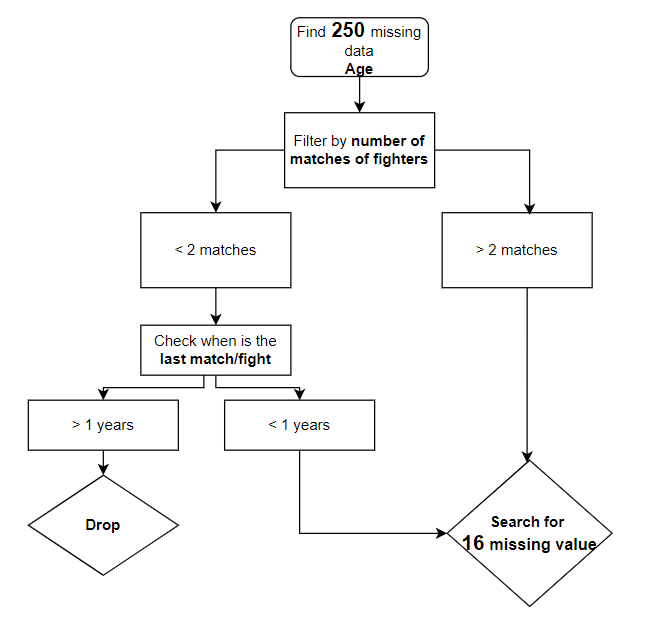

Coding parts for sorting/ filling missing data

In [ ]:
#Count missing Age
R = matches[matches['R_age'].isnull()]['R_fighter'].to_frame().value_counts().to_frame()
B = matches[matches['B_age'].isnull()]['B_fighter'].to_frame().value_counts().to_frame()
total = pd.concat([B, R], axis=0)
total.groupby('B_fighter').sum().sort_values(by=0, ascending=False)
matches[(matches['R_fighter'].isin(a)) | (matches['B_fighter'].isin(a))].sort_values('date', ascending=False)
def count_null(column):
    return column.isnull().sum()
matches.apply(count_null,axis = 0).to_frame()

#And count missing 
matches[(matches['R_Height_cms'].isnull()) | (matches['B_Height_cms'].isnull())][['R_fighter','R_Height_cms','B_fighter','B_Height_cms']]

#3. EXPLORATORY DATA ANALYSIS
We use both SQL & Pandas for this step



##a. Number of fighters & match records in the data

In [17]:
print("Number of total fighters of UFC (include amateur & professional): ", fighters.shape[0])
print("Number of matches records (only professional ): ", matches.shape[0])

Number of total fighters of UFC (include amateur & professional):  3313
Number of matches records (only professional ):  5144


##b. Fighter by gender

In [16]:
# We use SQL to sort out number of females versus males and concat them with pandas
female_fighters = ps.sqldf('''
SELECT R_fighter as Female_Fighter FROM matches WHERE weight_class LIKE "%WOMEN%"
UNION 
SELECT B_fighter as Female_Fighter FROM matches WHERE weight_class LIKE "%WOMEN%"
''')

male_fighters=ps.sqldf('''
SELECT R_fighter as Male_Fighter FROM matches WHERE weight_class NOT LIKE "%WOMEN%"
UNION 
SELECT B_fighter as Male_Fighter FROM matches WHERE weight_class NOT LIKE "%WOMEN%"
''')
by_gender =pd.concat([male_fighters.count(), female_fighters.count()], axis=0).reset_index().rename(columns={'index':'Gender',0:'Total'})
by_gender

,Gender,Total
0,Male_Fighter,1770
1,Female_Fighter,149


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


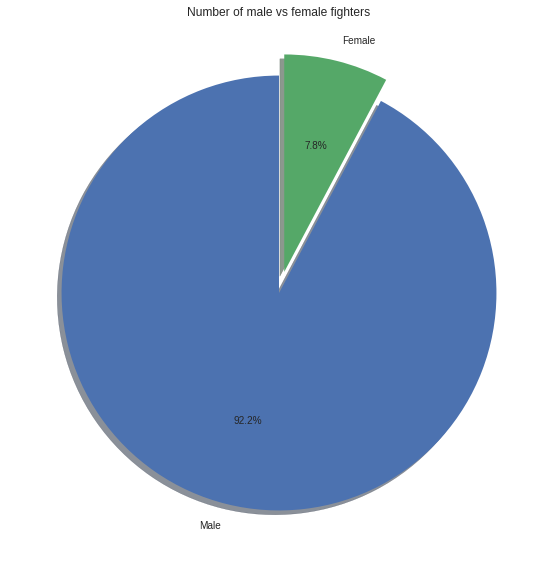

In [14]:
# Visualization
by_gender1 = [male_fighters.count(), female_fighters.count()]
plt.figure(figsize=(10,10))
explode = (0, 0.1)
plt.pie(by_gender1,explode=explode, labels=['Male', 'Female'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Number of male vs female fighters')
plt.show()


In [ ]:
#And visualize them bar chart
# plt.figure(figsize=(10,6))
# sns.barplot(data=compare,
#             x='sex', 
#             y = 'count')
# plt.show()


## c. Average number of matches

  From this data, we can define outlier that have significant number of matches highers than others

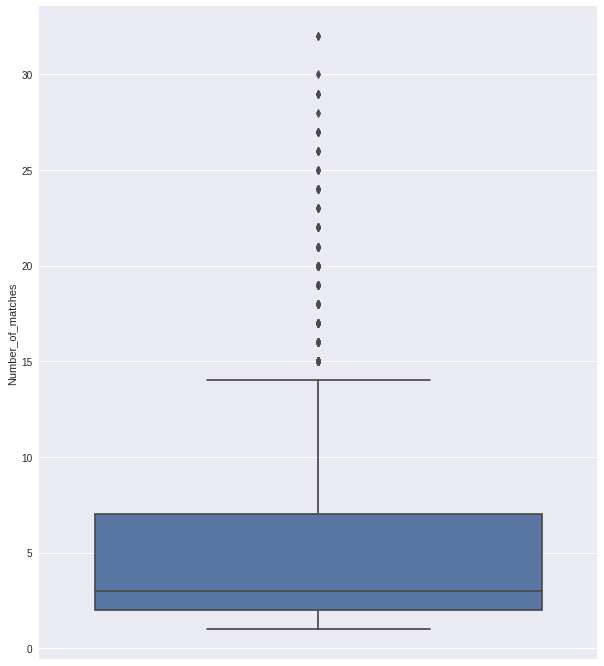

In [ ]:
#Finding number of matches of fighters in Red and Blue:
B1 = matches.groupby('B_fighter')[['R_fighter']].count().rename(columns={'B_fighter':'Fighter','R_fighter':'Number_of_matches'})
R1 = matches.groupby('R_fighter')[['B_fighter']].count().rename(columns={'R_fighter':'Fighter','B_fighter':'Number_of_matches'})
total1 = pd.concat([B1, R1], axis=0).reset_index()
Number_of_matches = total1.rename(columns={'index':'Fighter'}).groupby('Fighter')['Number_of_matches'].sum().sort_values(ascending=False).to_frame()
#Identifying outlier
Q1 = Number_of_matches.quantile(0.25)
Q3 = Number_of_matches.quantile(0.75)
IQR = Q3 - Q1
upper_whisker = Q3 + 1.5*IQR
lower_whiker = Q1 - 1.5*IQR
#Visualize
plt.figure(figsize=(10,12))
sns.boxplot(data=Number_of_matches, 
            y = 'Number_of_matches')
plt.show()

##d. Average age of Fighters in matches

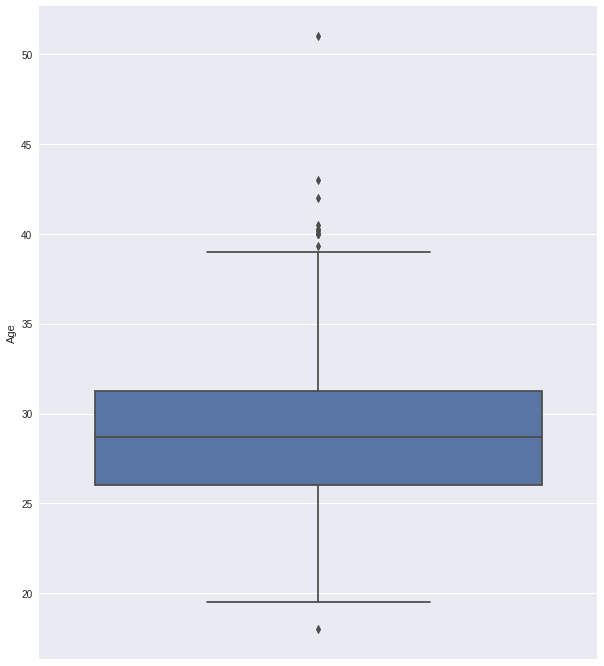

In [ ]:
#Average age of fighters
a = matches[(matches['R_age'] > 0) & (matches['R_age'] <100)][['R_fighter','R_age']].rename(columns={'R_fighter':'Fighter','R_age':'Age'})
b = matches[(matches['B_age'] > 0) & (matches['B_age'] <100)][['B_fighter','B_age']].rename(columns={'B_fighter':'Fighter','B_age':'Age'})
total3 = pd.concat((a, b), axis=0)
total3 = total3.groupby('Fighter')[['Age']].mean()
Q1 = total3.quantile(0.25)
Q3 = total3.quantile(0.75)
IQR = Q3 - Q1

upper_whisker = Q3 + 1.5*IQR
lower_whiker = Q1 - 1.5*IQR
# print(upper_whisker, lower_whiker)

# Visualize
plt.figure(figsize=(10,12))
sns.boxplot(data=total3, 
            y = 'Age')
plt.show()

##e. Top 5 Fighter have the most number of Title bouts

In [ ]:
ps.sqldf('''
WITH lis AS
(
SELECT *
FROM
(
SELECT B_fighter as Fighter, Max(B_total_title_bouts) as Total_title_bouts
FROM matches
GROUP BY Fighter
ORDER BY Total_title_bouts DESC
)
UNION ALL

SELECT *
FROM
(
SELECT R_fighter as Fighter, Max(R_total_title_bouts) as Total_title_bouts
FROM matches
GROUP BY Fighter
ORDER BY Total_title_bouts DESC
)
)
SELECT Fighter, max(Total_title_bouts) as Total_title_bouts FROM lis
GROUP BY Fighter
ORDER BY Total_title_bouts DESC
LIMIT 5
''')

,Fighter,Total_title_bouts
0,Randy Couture,16
1,Georges St-Pierre,14
2,Anderson Silva,13
3,Demetrious Johnson,13
4,Jon Jones,12


##f. Number of Fighter have less or equal then 3 matches.

In [ ]:
# Number of Fighter only have 1 matches
one_match_fighter = Number_of_matches[Number_of_matches['Number_of_matches'] == 1].reset_index()
a = matches[matches['B_fighter'].isin(one_match_fighter['Fighter'])][['B_fighter','date']].rename(columns={'B_fighter':'Fighter'})
a['date'] = pd.to_datetime(a['date'])

b = matches[matches['R_fighter'].isin(one_match_fighter['Fighter'])][['R_fighter','date']].rename(columns={'R_fighter':'Fighter'})
b['date'] = pd.to_datetime(b['date'])
total2 = pd.concat([b[b['date'] < '2019-01-01'], a[a['date'] < '2019-01-01']], axis=0)



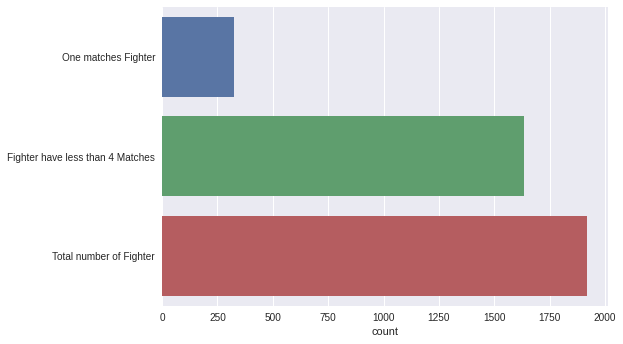

In [ ]:
# Number of Fighter have less or equal then 3 matches.
two_match_fighter = Number_of_matches[Number_of_matches['Number_of_matches'] <= 3].reset_index()
a = matches[matches['B_fighter'].isin(two_match_fighter['Fighter'])][['B_fighter','date']].rename(columns={'B_fighter':'Fighter'})
a['date'] = pd.to_datetime(a['date'])

b = matches[matches['R_fighter'].isin(two_match_fighter['Fighter'])][['R_fighter','date']].rename(columns={'R_fighter':'Fighter'})
b['date'] = pd.to_datetime(b['date'])
total3 = pd.concat([b[b['date'] < '2019-01-01'], a[a['date'] < '2019-01-01']], axis=0)

c=total3.count().to_frame().loc[['Fighter']].rename(columns={0:'count'})[['count']].reset_index()
b=compare.sum().to_frame().T[['count']].reset_index()
a=total2.count().to_frame().loc[['Fighter']].rename(columns={0:'count'})[['count']].reset_index()
compare3 = pd.concat((a,c,b), axis=0)
compare3.iloc[0,0] = 'a'

plt.figure()
sns.barplot(data=compare3, y = 'index', x = 'count',ci=None)
plt.yticks(ticks=[0, 1, 2],
           labels=['One matches Fighter','Fighter have less than 4 Matches', 'Total number of Fighter'])
plt.ylabel('')
plt.show()